Анализ Data set с помощью алгоритма Random Forest

Загрузите датасет digits с помощью функции load_digits из sklearn.datasets и 
подготовьте матрицу признаков X и ответы на обучающей выборке y 
(вам потребуются поля data и target в объекте, который возвращает load_digits). 
Для оценки качества далее нужно будет использовать cross_val_score из sklearn.model_selection. 
Эта функция реализует k-fold cross validation c k равным значению параметра cv. 
Какой параметр k min можно использовать, чтобы полученные оценки качества имели небольшой разброс, 
и было проще проверить полученные ответы? 
Значение функции cross_val_score превратите в виде numpy.ndarray, 
в котором будет k чисел – показывающее качество в каждом из k экспериментов k-fold cross validation.  
Как отрабатываются ситуации, когда качество модели в каком-то из пунктов не попадет в диапазон, 
заданный для правильных ответов? 

In [1]:
from math import sqrt
import numpy as np
import pandas as pd
from tqdm import tqdm
from scipy import stats
import os
from sklearn import datasets, tree, ensemble
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

digits = datasets.load_digits()

X = digits.data
y = digits.target

def write_answer(cross_val_score, file_name):
    with open(file_name, "w") as fout:
        fout.write(str(cross_val_score))

In [2]:
os.chdir('/Volumes/Data/ML')

**Задча 1.**

Создайте DecisionTreeClassifier с настройками по умолчанию и 
измерьте качество его работы с помощью cross_val_score. 
Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество 
его работы с помощью cross_val_score. Эта величина и будет ответом в пункте 1.

In [3]:
clf = tree.DecisionTreeClassifier(random_state=42)
score1 = cross_val_score(clf, X, y, cv=10).mean()
write_answer(score1, 'answer_1.txt')
print(score1)

0.8335909373060211


**Задач 2.**

Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. 
Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100. 
Обратите внимание, как соотносится качество работы композиции решающих деревьев 
с качеством работы одного решающего дерева.
Качество классификации новой модели - ответ в пункте 2.

In [4]:
bagging_clf = ensemble.BaggingClassifier(clf, n_estimators=100)
score2 = cross_val_score(bagging_clf, X, y, cv=10).mean()
write_answer(score2, 'answer_2.txt')
print(score2)

0.9237150837988827


**Задача 3.**

Теперь изучите параметры BaggingClassifier и выберите их такими, 
чтобы каждый базовый алгоритм обучался не на всех d признаках (сколько признаков?). 
Качество работы получившегося классификатора?. 
Корень из числа признаков - часто используемая эвристика для bagging в задачах классификации, 
в задачах регрессии же часто берут число признаков, деленное на три. 
Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.


In [5]:
d = int(sqrt(X.shape[1]))
bagging_clf = ensemble.BaggingClassifier(clf, n_estimators=100, max_features=d)
score3 = cross_val_score(bagging_clf, X, y, cv=10).mean()
write_answer(score3, 'answer_3.txt')
print(score3)

0.9337833643699565


**Задача 4.**

Выбираем случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. 
Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier 
и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn. 

In [6]:
clf2 = tree.DecisionTreeClassifier(max_features=d)
bagging_clf = ensemble.BaggingClassifier(clf2, n_estimators=100)
score4 = cross_val_score(bagging_clf, X, y, cv=10).mean()
write_answer(score4, 'answer_4.txt')
print(score4)

0.9493513345747981


**Задача 5.**

Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях 
(в которых при построении каждой вершины выбирается случайное подмножество признаков 
 и разбиение ищется только по ним).
 Покажите как качество классификации на датасете зависит от количества деревьев, количества признаков, 
 выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. 
 Для наглядности лучше построить графики зависимости качества от значений параметров, 
 но для сдачи задания это делать не обязательно. 

In [7]:
clf3 = ensemble.RandomForestClassifier(random_state=d, n_estimators=100)
score5 = cross_val_score(clf3, X, y, cv=10).mean()
print(score5)

0.9487988826815641


**Задача 6.**

На дата сете для задания покажите: 
- 1) Случайный лес сильно переобучается с ростом количества деревьев
- 2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев
- 3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.
- 4) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.
- 5) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).


**1) Случайный лес сильно переобучается с ростом количества деревьев**

Нет, это не так. Каждое дерево в случайном лесе сильно переобучается, 
а качество обучения композиции деревьев выходит на некую константу в зависимости от числа деревьев в композиции.

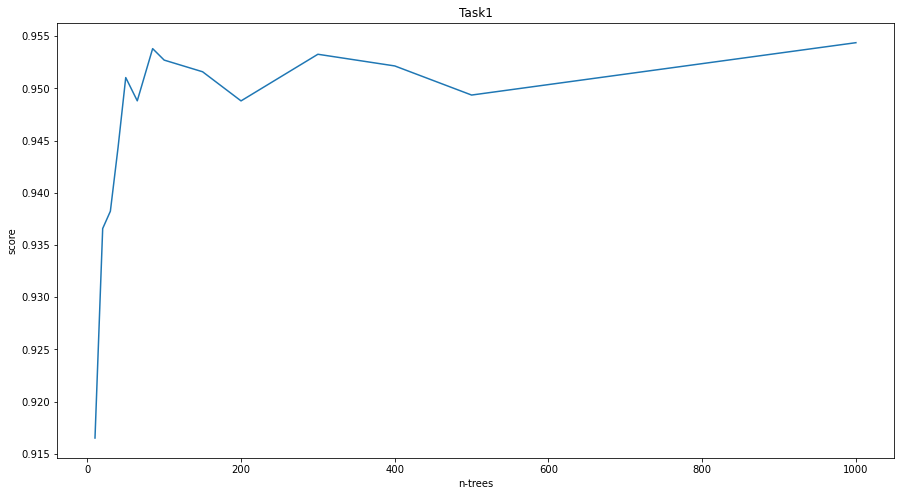

In [8]:
trees = [10, 20, 30, 40, 50, 65, 85, 100, 150, 200, 300, 400, 500, 1000]
results = []
for tree in trees:
    rf = ensemble.RandomForestClassifier(n_estimators=tree)
    results.append(cross_val_score(rf, X, y, cv=10).mean())
plt.figure(figsize=(15, 8))
plt.plot(trees, results)
plt.xlabel("n-trees")
plt.ylabel("score")
plt.title("Task1")
plt.show()

**2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев**

Да, это так. При композиции алгоритмов разброс ошибки обратно пропорционален кол-ву алгоритмов, 
поэтому при маленьком числе деревьев качество хуже, чем при большом.

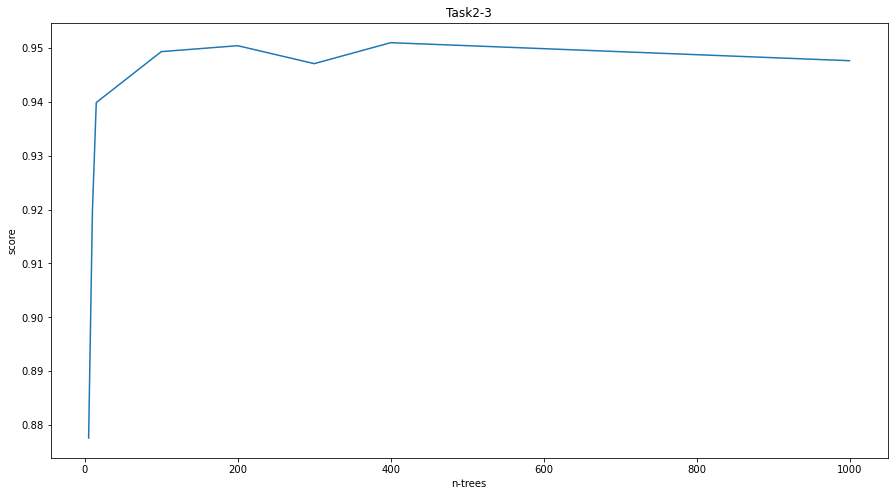

In [9]:
trees = [5, 10, 15, 100, 200, 300, 400, 500, 1000]
results = []
for tree in trees:
    rf = ensemble.RandomForestClassifier(n_estimators=tree)
    results.append(cross_val_score(rf, X, y, cv=10).mean())
plt.figure(figsize=(15, 8))
plt.plot(trees, results)
plt.xlabel("n-trees")
plt.ylabel("score")
plt.title("Task2-3")
plt.show()

**3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.**

Да, это отражено на графике выше.

**4) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.**

Нет, это не так. Чем более переобучено дерево тем лучше это для композиции.

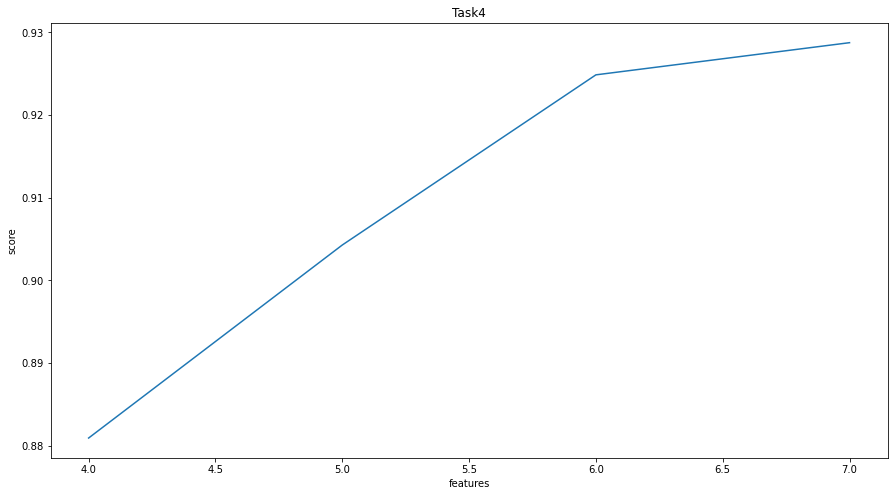

In [10]:
d = X.shape[1]
depth = [4, 5, 6, 7]
results = []
for d in depth:
    rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=42, max_depth=d)
    results.append(cross_val_score(rf, X, y, cv=10).mean())
plt.figure(figsize=(15, 8))
#plt.plot(depth, results, 'o')
plt.plot(depth, results)
plt.xlabel("features")
plt.ylabel("score")
plt.title("Task4")
plt.show()

**5) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).**

Да, это так.

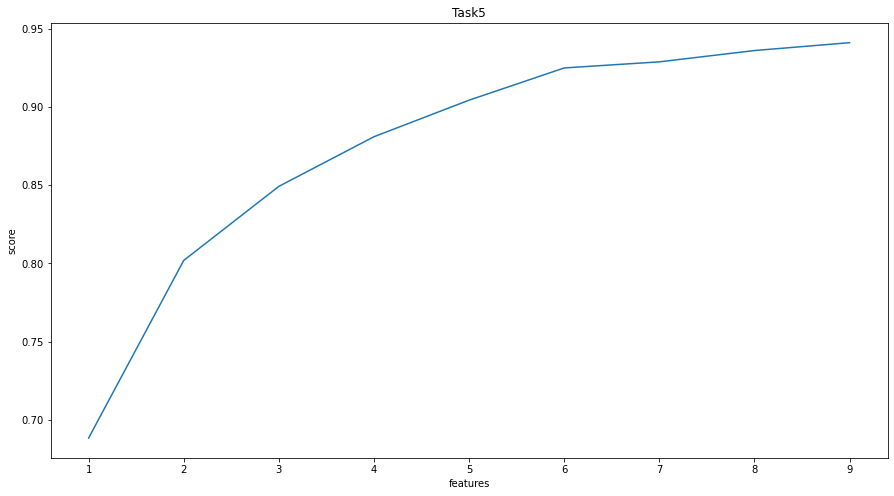

In [11]:
d = X.shape[1]
depth = [x for x in range(1, 10)]
results = []
for d in depth:
    rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=42, max_depth=d)
    results.append(cross_val_score(rf, X, y, cv=10).mean())
plt.figure(figsize=(15, 8))
plt.plot(depth, results)
plt.xlabel("features")
plt.ylabel("score")
plt.title("Task5")
plt.show()